## Importing the data and understanding it.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# we won't be needing the following columns in the model building process.
df.drop(["instant", "dteday", "casual", "registered"], axis = 1, inplace = True)

In [10]:
#converting categorical variables into 
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualizing the data

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

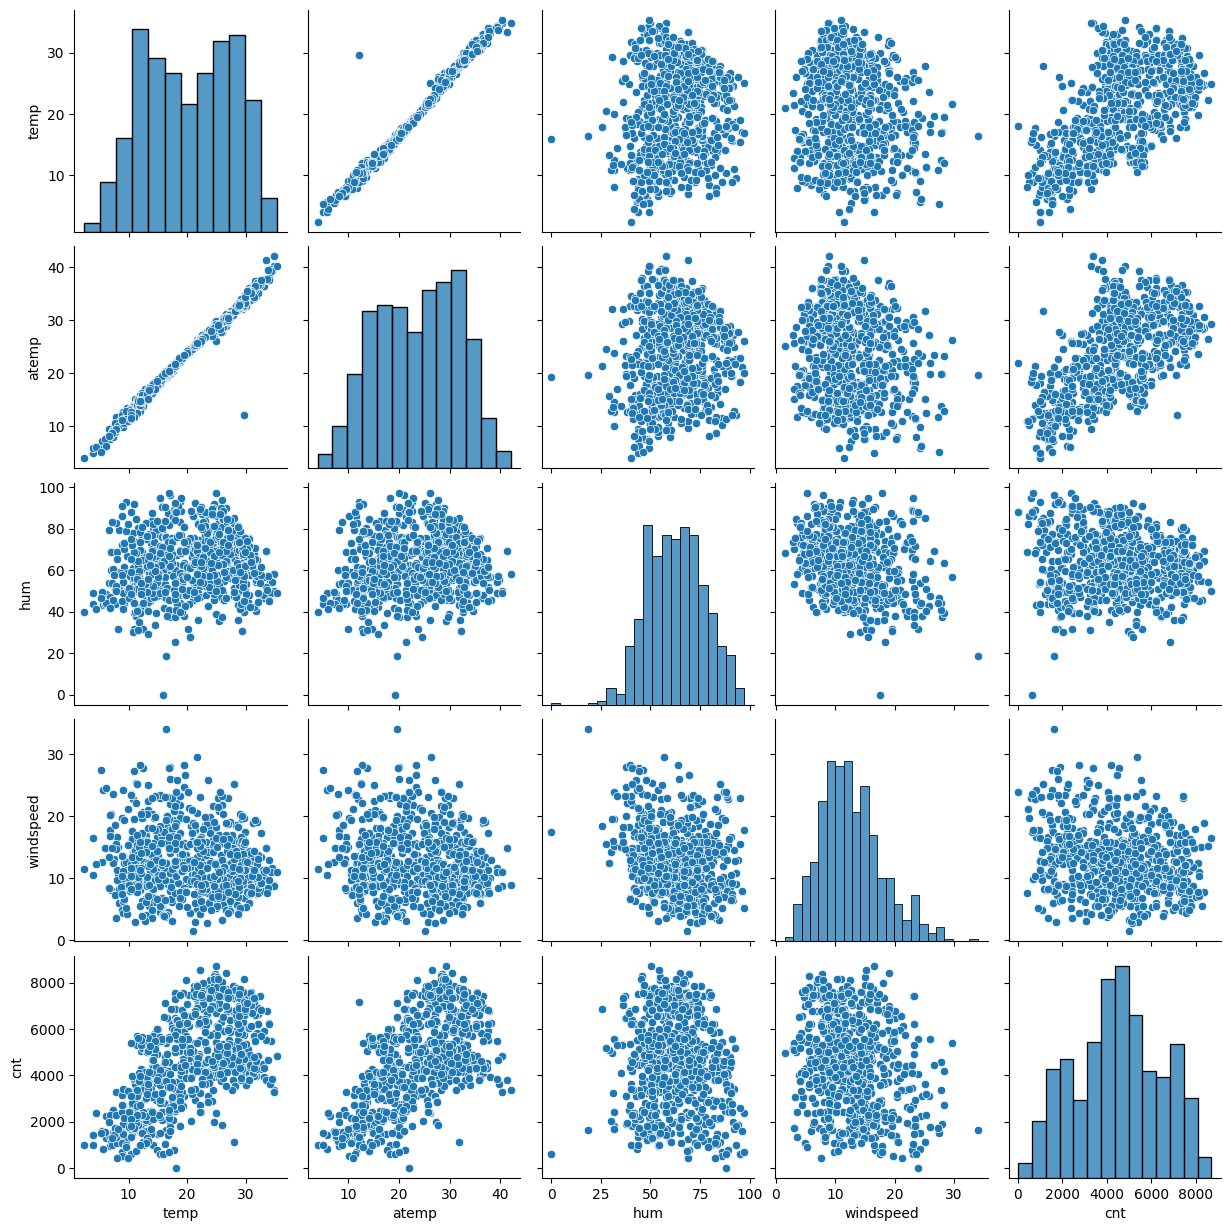

In [12]:
sns.pairplot(data = df, vars = ["temp", "atemp", "hum", "windspeed", "cnt"])
plt.show()

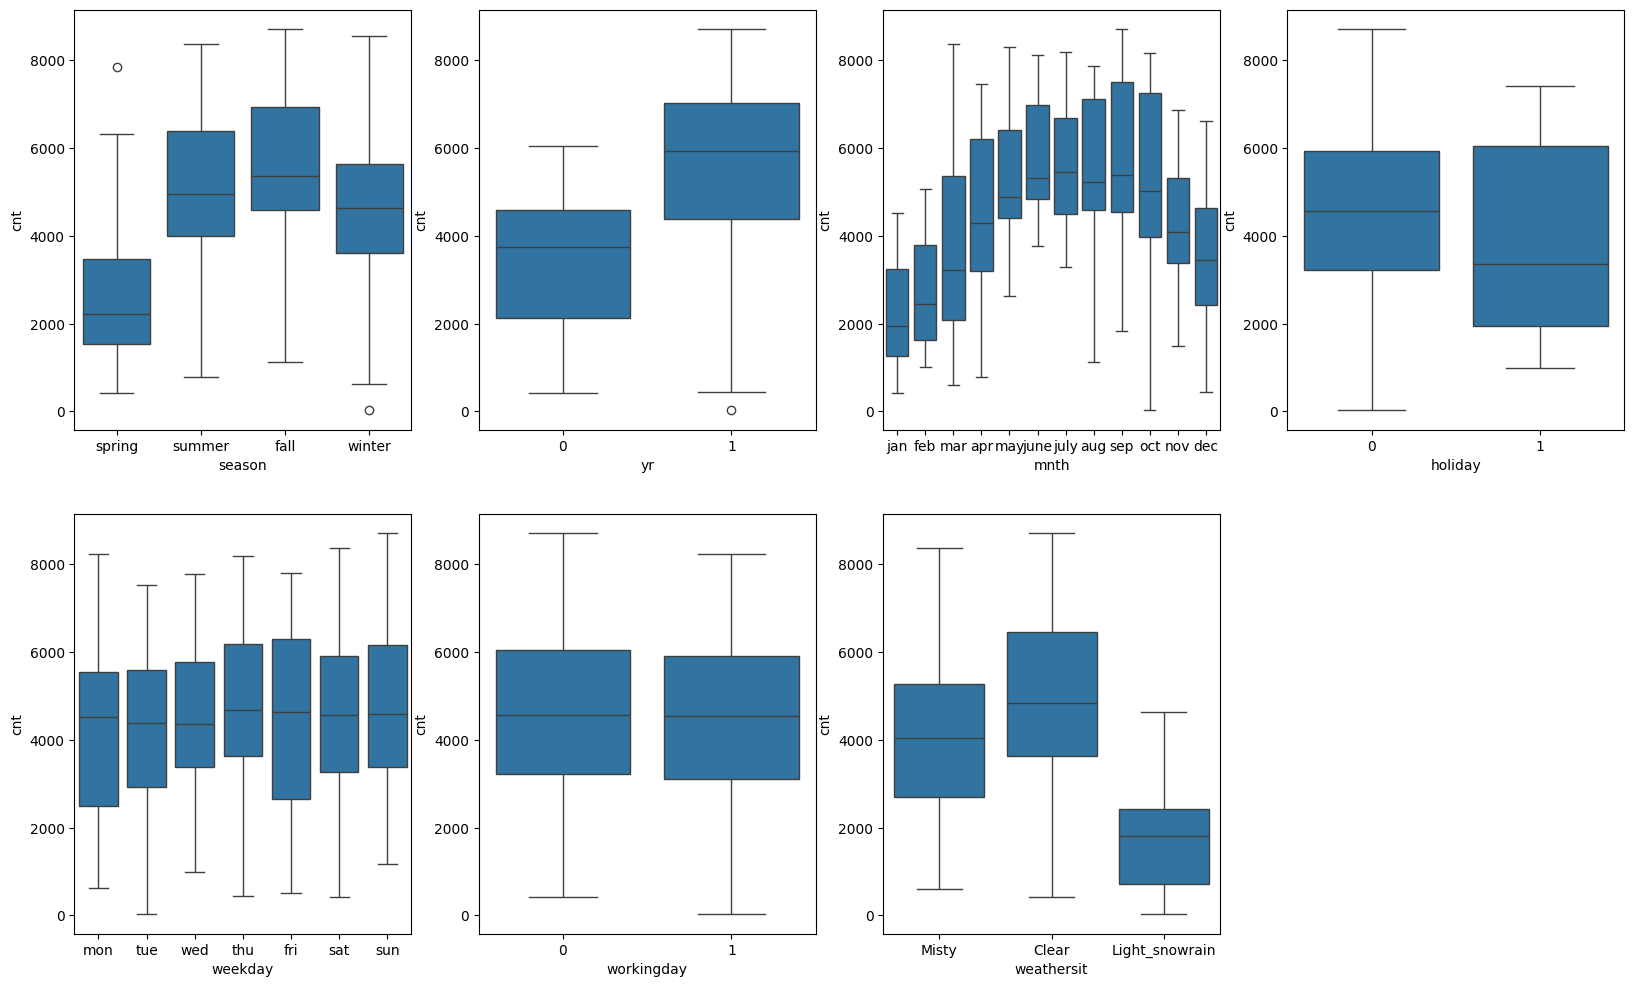

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

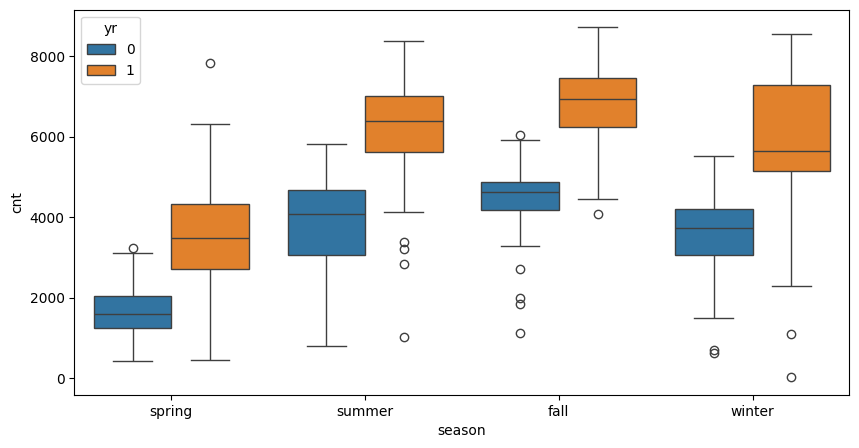

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = df)
plt.show()

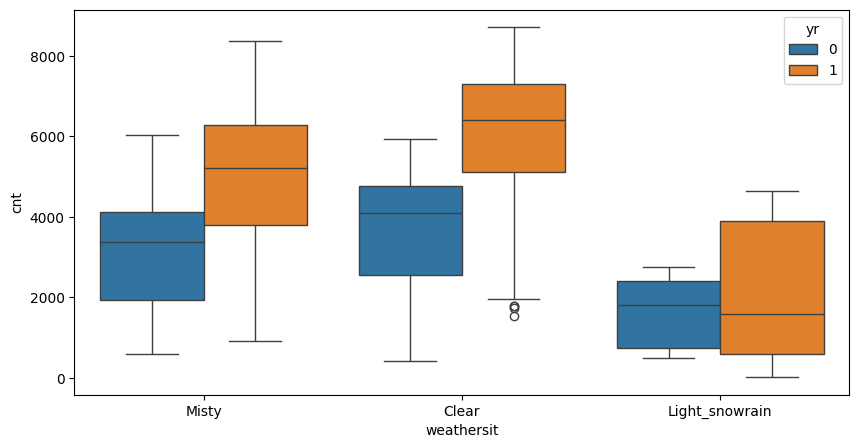

In [15]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = df)
plt.show()

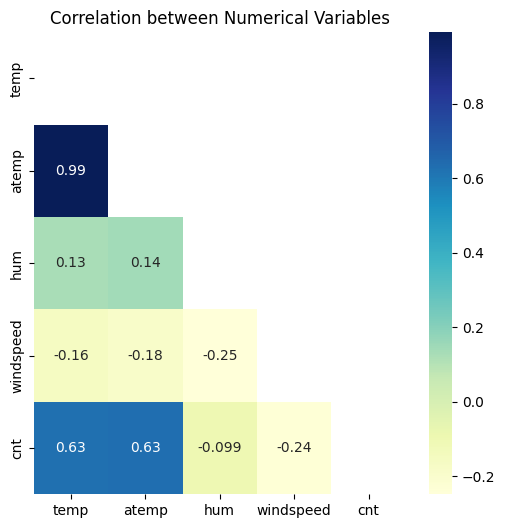

In [16]:
plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

## Data Preparation

In [17]:
df_months = pd.get_dummies(df.mnth, drop_first=True, dtype = int)
df_weekdays = pd.get_dummies(df.weekday,drop_first=True, dtype = int)
df_weathersit = pd.get_dummies(df.weathersit, drop_first=True, dtype = int)
df_seasons = pd.get_dummies(df.season, drop_first=True, dtype = int)

In [18]:
df = pd.concat([df, df_months, df_weekdays, df_weathersit, df_seasons],axis=1)

In [19]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [20]:
df.drop(["season", "mnth", "weekday", "weathersit"], axis = 1, inplace = True)

In [21]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


## Splitting dataset into training and testing sets.

In [22]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
numerical_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

In [26]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0


In [27]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [28]:
df_train.shape

(510, 30)

In [29]:
df_test.shape

(219, 30)

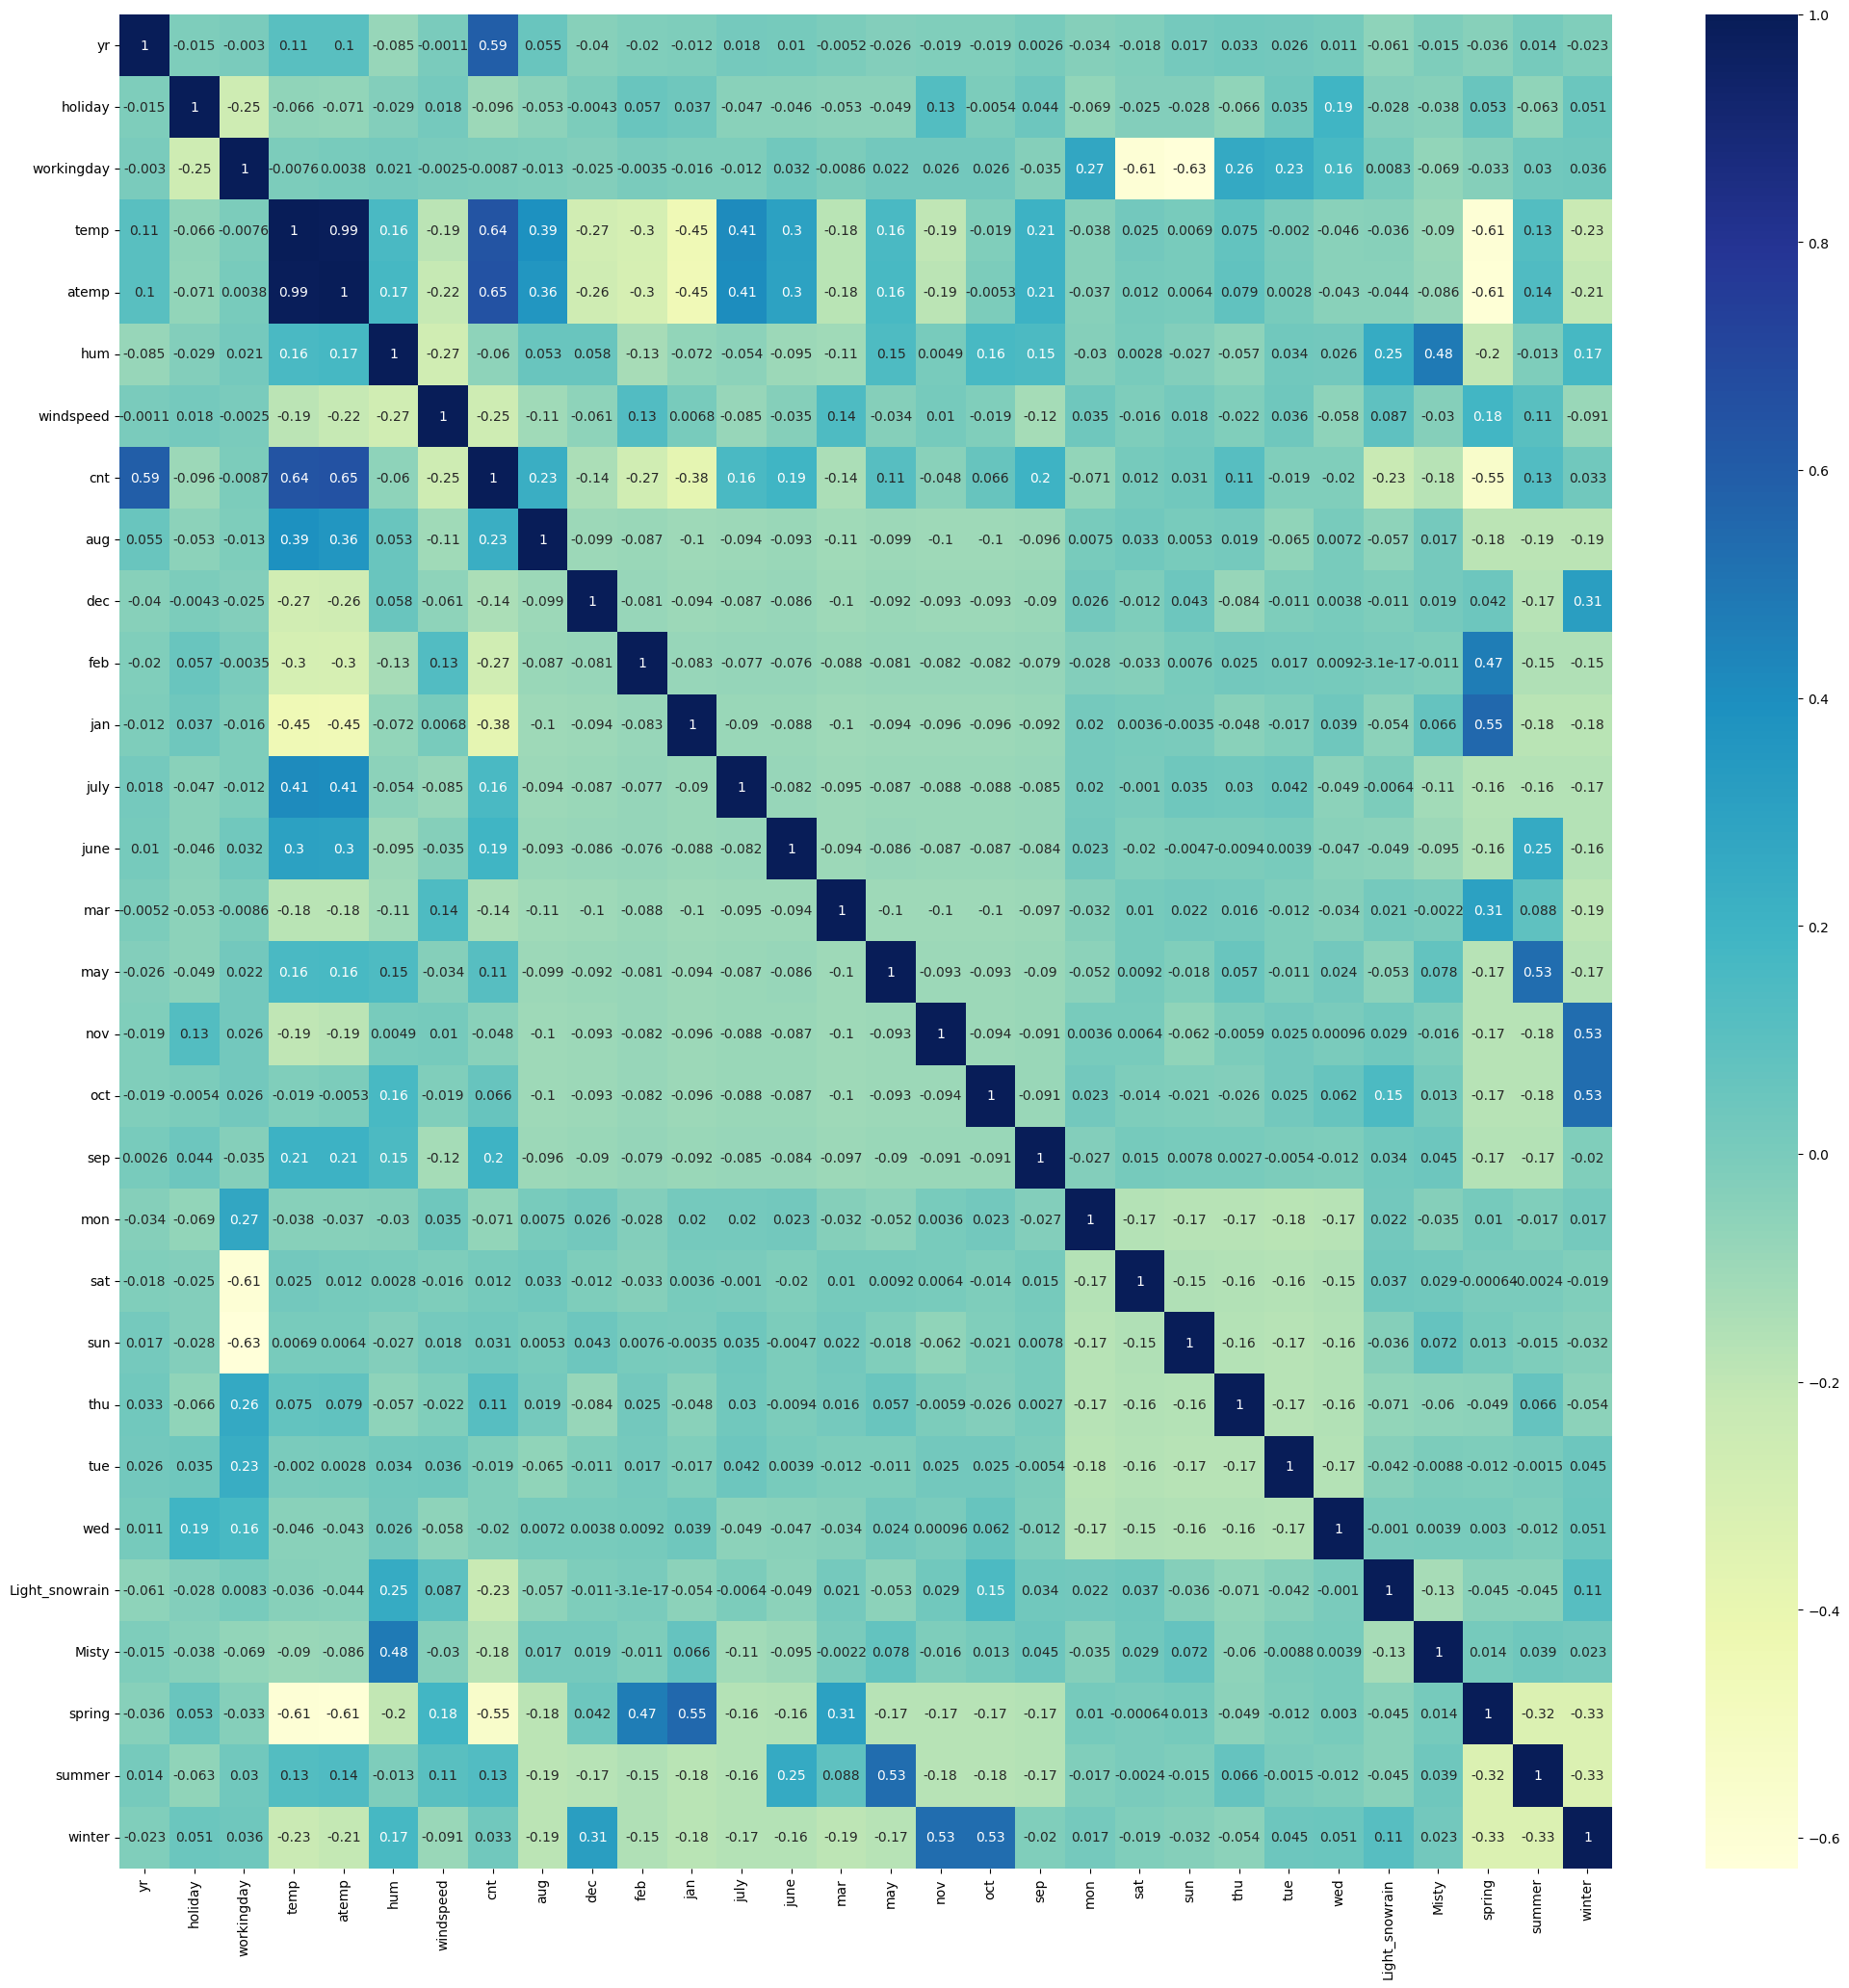

In [30]:
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### The "yr", "temp" and "atemp" variables show high correlation with out target "cnt" variable.

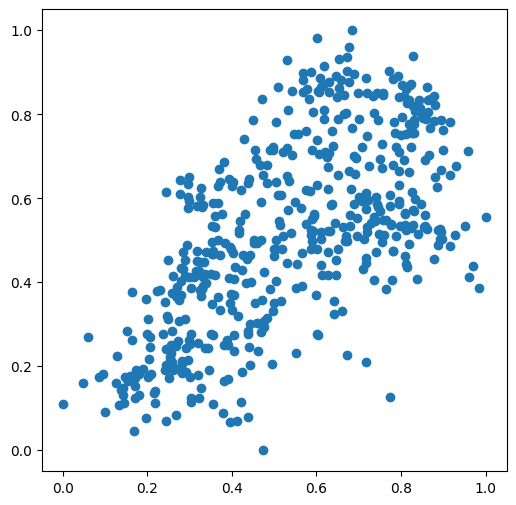

In [31]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

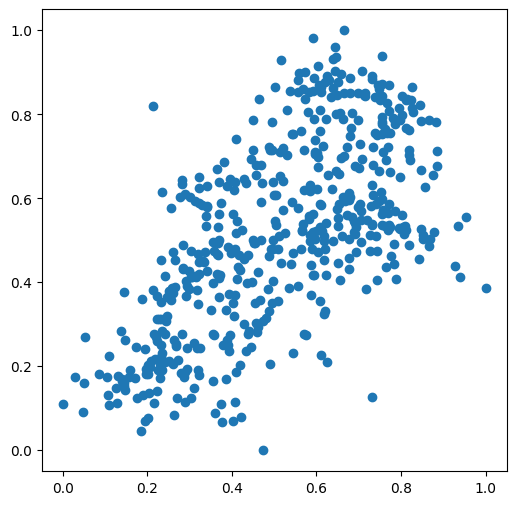

In [32]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### Assigning "X" and "Y" variables to make linear regression model.

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

In [34]:
import statsmodels.api as sm

# We'll first try adding only the 'temp' variable in X.
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [35]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

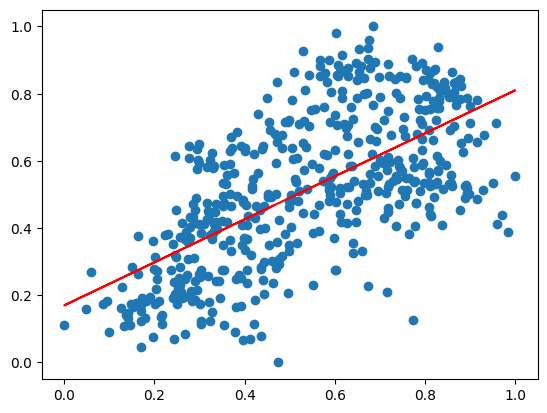

In [36]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.170 + 0.640*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [37]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           5.80e-61
Time:                        18:26:44   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

#### We can observe that about 41.4% of variance is explained by the model. Now we'll try adding more variables.

#### Next we'll try adding another variable with high correlation with 'cnt', i.e. 'yr'.

In [38]:
X_train_lm = X_train[['temp', 'yr']]

In [39]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [40]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          9.25e-130
Time:                        18:26:44   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

#### Now we can observe the R-Squared increased to 69% after adding 'yr' as a predictor.

#### Let's try adding all the variables.

In [41]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const             0.394765
yr                0.230933
holiday          -0.135245
workingday       -0.060878
temp              0.400268
atemp             0.046419
hum              -0.157757
windspeed        -0.181137
aug               0.023034
dec              -0.045685
feb              -0.037177
jan              -0.063451
july             -0.033912
june              0.002144
mar               0.000805
may               0.024765
nov              -0.041530
oct               0.005922
sep               0.086720
mon              -0.024668
sat              -0.056309
sun              -0.050307
thu               0.003841
tue              -0.026341
wed              -0.011247
Light_snowrain   -0.250902
Misty            -0.059311
spring           -0.044097
summer            0.041756
winter            0.110482
dtype: float64

In [42]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          4.09e-178
Time:                        18:26:44   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3948      0.085      4.

#### The R-Squared has increased to 85.1%, but there are many variables that have high p-value (insignificant) and we should also check for multicollinearity using VIF method.

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,442.82
4,atemp,382.51
2,workingday,63.90
5,hum,41.21
26,spring,13.56
28,winter,12.53
20,sun,12.35
19,sat,11.84
27,summer,9.87
15,nov,7.16


In [45]:
X = X_train.drop(['atemp', 'workingday', 'hum'], axis = 1)

In [46]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const             0.269862
yr                0.235090
holiday          -0.083009
temp              0.395790
windspeed        -0.155141
aug               0.017436
dec              -0.067656
feb              -0.050459
jan              -0.082650
july             -0.031900
june              0.008080
mar              -0.007447
may               0.016353
nov              -0.060062
oct              -0.011524
sep               0.073977
mon              -0.023956
sat               0.006545
sun               0.013043
thu               0.005762
tue              -0.028342
wed              -0.009848
Light_snowrain   -0.293782
Misty            -0.083455
spring           -0.047909
summer            0.033026
winter            0.106241
dtype: float64

In [47]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     101.8
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          1.63e-177
Time:                        18:26:45   Log-Likelihood:                 514.97
No. Observations:                 510   AIC:                            -975.9
Df Residuals:                     483   BIC:                            -861.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2699      0.043      6.

In [48]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,26.94
25,winter,11.59
23,spring,11.36
13,oct,5.97
24,summer,5.92
4,aug,5.72
12,nov,5.47
8,july,5.28
3,windspeed,4.95
7,jan,4.57


In [49]:
# removing high p-value variables.
X = X.drop(['aug', 'july', 'june', 'mar', 'may', 'oct', 'sat', 'sun', 'thu', 'wed'], axis = 1)

In [50]:
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const             0.263175
yr                0.235144
holiday          -0.090242
temp              0.404788
windspeed        -0.155899
dec              -0.056520
feb              -0.041481
jan              -0.074250
nov              -0.048189
sep               0.079150
mon              -0.027891
tue              -0.033477
Light_snowrain   -0.298052
Misty            -0.081165
spring           -0.049260
summer            0.043695
winter            0.100637
dtype: float64

In [51]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.9
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          4.50e-186
Time:                        18:26:45   Log-Likelihood:                 509.95
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     493   BIC:                            -913.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2632      0.033      7.

In [52]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.70
13,spring,4.17
2,temp,4.02
15,winter,2.82
6,jan,2.20
0,yr,2.08
14,summer,1.91
5,feb,1.88
7,nov,1.81
12,Misty,1.56


In [53]:
X = X.drop('feb', axis = 1)

In [54]:
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const             0.248240
yr                0.234811
holiday          -0.092950
temp              0.422433
windspeed        -0.154086
dec              -0.045990
jan              -0.052204
nov              -0.042632
sep               0.081110
mon              -0.027234
tue              -0.033783
Light_snowrain   -0.297163
Misty            -0.081167
spring           -0.060514
summer            0.047765
winter            0.102783
dtype: float64

In [55]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.8
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          1.97e-186
Time:                        18:26:45   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     494   BIC:                            -916.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2482      0.032      7.

In [56]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.70
2,temp,3.99
14,winter,2.78
12,spring,2.78
0,yr,2.07
13,summer,1.91
6,nov,1.80
5,jan,1.65
11,Misty,1.56
4,dec,1.46


In [57]:
X = X.drop('nov', axis = 1)

In [58]:
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.params

const             0.230080
yr                0.234682
holiday          -0.099941
temp              0.443437
windspeed        -0.155085
dec              -0.030420
jan              -0.046945
sep               0.086930
mon              -0.027056
tue              -0.033413
Light_snowrain   -0.292989
Misty            -0.080401
spring           -0.051817
summer            0.053634
winter            0.092716
dtype: float64

In [59]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          1.73e-186
Time:                        18:26:45   Log-Likelihood:                 505.51
No. Observations:                 510   AIC:                            -981.0
Df Residuals:                     495   BIC:                            -917.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2301      0.031      7.

In [60]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.65
2,temp,3.97
11,spring,2.78
0,yr,2.07
13,winter,1.92
12,summer,1.90
5,jan,1.65
10,Misty,1.56
4,dec,1.29
7,mon,1.23


In [61]:
X = X.drop('dec', axis = 1)

In [62]:
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

lr_6.params

const             0.216148
yr                0.234710
holiday          -0.098476
temp              0.458351
windspeed        -0.150322
jan              -0.039560
sep               0.089419
mon              -0.027277
tue              -0.032986
Light_snowrain   -0.290394
Misty            -0.080369
spring           -0.050107
summer            0.057015
winter            0.090950
dtype: float64

In [63]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          6.86e-187
Time:                        18:26:45   Log-Likelihood:                 503.71
No. Observations:                 510   AIC:                            -979.4
Df Residuals:                     496   BIC:                            -920.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2161      0.030      7.

In [64]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.64
2,temp,3.96
10,spring,2.65
0,yr,2.07
11,summer,1.90
12,winter,1.67
4,jan,1.60
9,Misty,1.56
6,mon,1.23
5,sep,1.23


In [65]:
X = X.drop('jan', axis = 1)

In [66]:
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

lr_7.params

const             0.199462
yr                0.233979
holiday          -0.099224
temp              0.477365
windspeed        -0.143067
sep               0.090352
mon              -0.027649
tue              -0.033002
Light_snowrain   -0.289147
Misty            -0.081251
spring           -0.055392
summer            0.060730
winter            0.097655
dtype: float64

In [67]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.8
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          5.30e-187
Time:                        18:26:45   Log-Likelihood:                 501.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     497   BIC:                            -921.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.029      6.

In [68]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.63
2,temp,3.95
0,yr,2.07
9,spring,2.02
10,summer,1.90
11,winter,1.67
8,Misty,1.54
6,tue,1.23
4,sep,1.23
5,mon,1.22


In [69]:
X = X.drop('mon', axis = 1)

In [70]:
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

lr_8.params

const             0.192102
yr                0.234491
holiday          -0.094922
temp              0.480376
windspeed        -0.145494
sep               0.091182
tue              -0.027971
Light_snowrain   -0.289004
Misty            -0.080385
spring           -0.053930
summer            0.061806
winter            0.098103
dtype: float64

In [71]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.4
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          6.02e-187
Time:                        18:26:46   Log-Likelihood:                 498.23
No. Observations:                 510   AIC:                            -972.5
Df Residuals:                     498   BIC:                            -921.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1921      0.029      6.

In [72]:
X = X.drop('tue', axis = 1)

In [73]:
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

lr_9.params

const             0.190994
yr                0.234060
holiday          -0.096865
temp              0.478177
windspeed        -0.148155
sep               0.090932
Light_snowrain   -0.286002
Misty            -0.080124
spring           -0.055092
summer            0.060987
winter            0.095929
dtype: float64

In [74]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          7.36e-187
Time:                        18:26:46   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1910      0.030      6.

In [75]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.89
9,winter,1.63
6,Misty,1.54
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


### Now all variables seem significant and no multicollinearity is observed in VIF.

## Residual Analysis.

In [76]:
y_train_cnt = lr_9.predict(X_train_lm)

Text(0.5, 0, 'Errors')

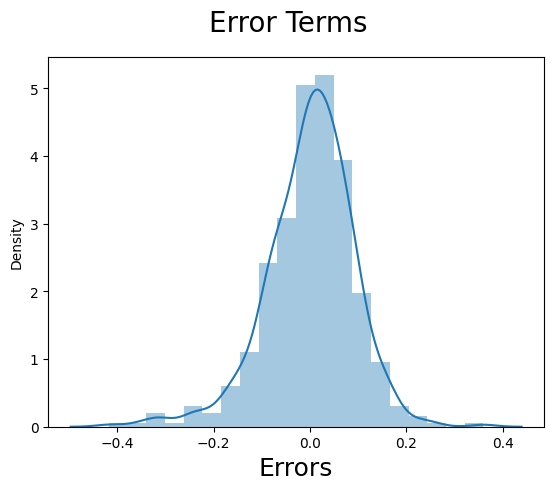

In [77]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

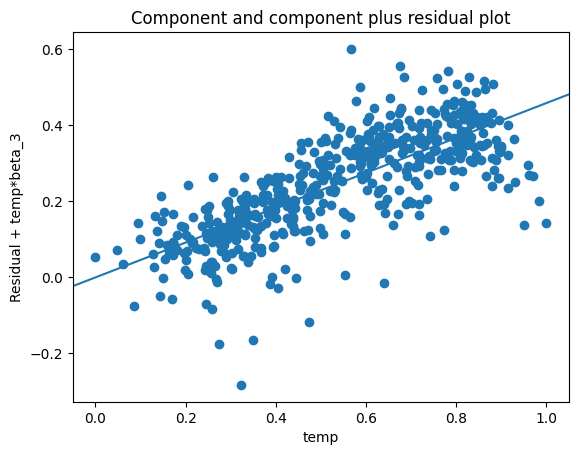

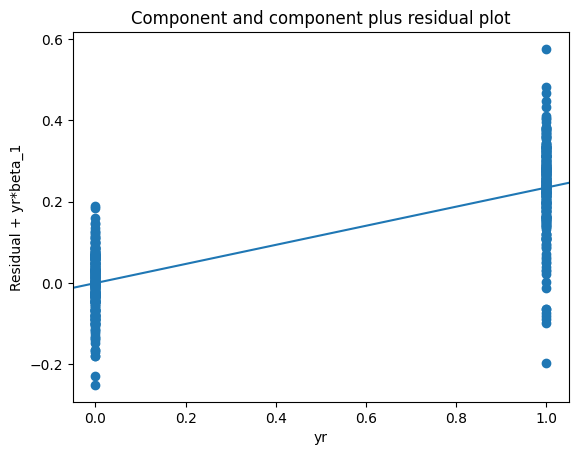

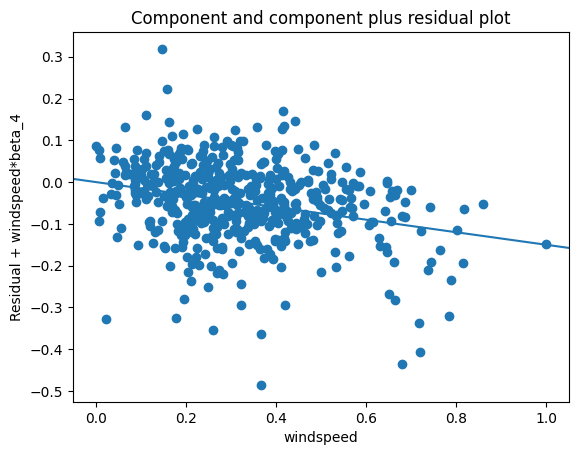

In [78]:
sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'yr')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

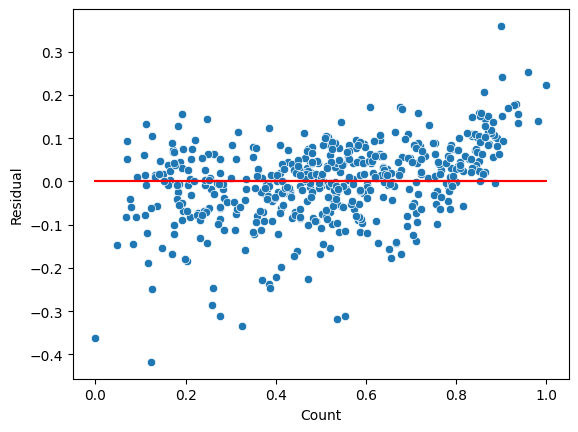

In [79]:
y_train_cnt = lr_9.predict(X_train_lm)
residual = y_train - y_train_cnt
sns.scatterplot(x = y_train, y = residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Performing predictions.

In [80]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [81]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
y_test = df_test.pop('cnt')
X_test = df_test

In [83]:
col = X.columns
col

Index(['yr', 'holiday', 'temp', 'windspeed', 'sep', 'Light_snowrain', 'Misty',
       'spring', 'summer', 'winter'],
      dtype='object')

In [84]:
X_test = X_test[col]

In [85]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
184,1.0,0,1,0.831783,0.084219,0,0,1,0,0,0
535,1.0,1,0,0.901354,0.153728,0,0,0,0,1,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,1,0


In [86]:
y_pred_sm = lr_9.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

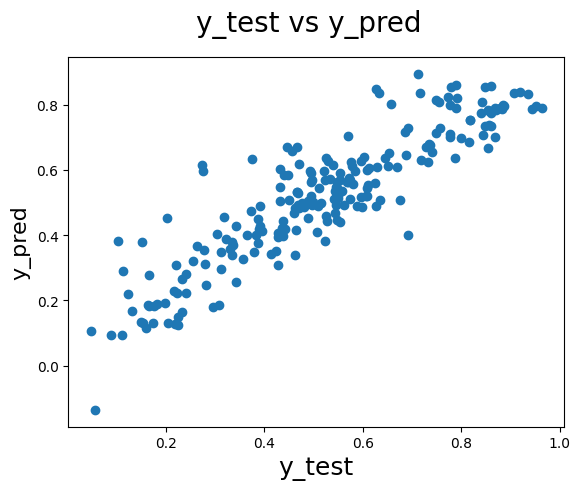

In [87]:
fig = plt.figure()
plt.scatter(y_test, y_pred_sm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [88]:
from sklearn.metrics import r2_score

In [89]:
r2 = r2_score(y_test, y_pred_sm)
round(r2,2)

0.8

In [90]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),2)
print(adjusted_r2)

0.79


## In conclusion, 'yr', 'holiday', 'temp', 'windspeed', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer' and 'winter' variables determine the 'cnt' target variable the most. 